# 梯度 Gradient

在微積分裡面，對多元函數的參數求∂偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。

比如函數f(x), 對x求偏導數，求得的梯度向量就是(∂f/∂x),簡稱grad f(x)或者▽f (x)


# 梯度下降法
給定起始點與目標函數的一階導函數(偏導數)，求在epochs次迭代中x的更新值


y = w*x (為了計算方便, 假設 w=x), 所以 y=(x)^2, 

func(x) = y=(x)^2

一階導函數: dy/dw=2*x, df = dy/dw

v表示w要改變的幅度v = - (dL/dw)* lr 

w <-- w + v (w <-- w-lr*df)

考慮bias: y = b + w*x (set b=0)


# 作業:

(1)dfunc 是 func 偏微分的公式，X^2 偏微分等於 2 * X，可以同時改變 func、dfunc 內容

(2)調整其它 Hyperparameters: w_init、epochs、lr、decay、momentom測試逼近的過程

Different Initial weight:
epochs:15, learning rate:0.20001000000000002

x:[ 1.         -1.40012    -2.840144   -3.7041296  -4.22250367 -4.53351775
 -4.72011998 -4.83207759 -4.89924991 -4.93955196 -4.96373239 -4.97824016
 -4.98694453 -4.99216698 -4.99530034 -4.9971803 ]


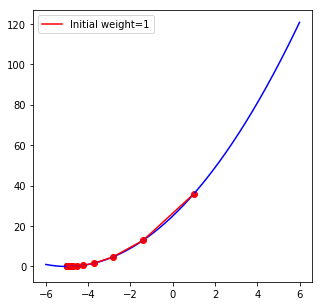

x:[ 2.         -0.80014    -2.480168   -3.48815119 -4.09292095 -4.45577071
 -4.67347331 -4.80409052 -4.88245823 -4.92947729 -4.95768778 -4.97461352
 -4.98476862 -4.99086148 -4.99451707 -4.99671035]


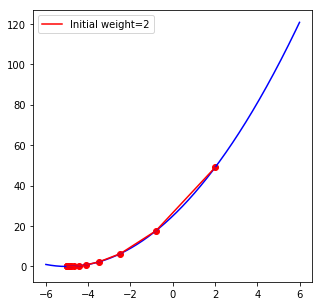

x:[ 3.         -0.20016    -2.120192   -3.27217279 -3.96333823 -4.37802367
 -4.62682664 -4.77610345 -4.86566655 -4.91940262 -4.95164318 -4.97098688
 -4.98259271 -4.98955597 -4.99373379 -4.9962404 ]


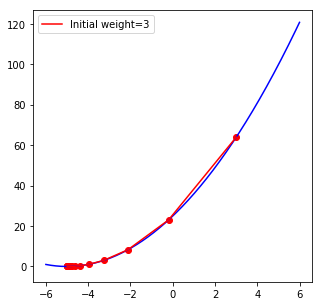

Different epochs:
initial weight:3, learning rate:0.20001000000000002

x:[ 3.         -0.20016    -2.120192   -3.27217279 -3.96333823 -4.37802367]


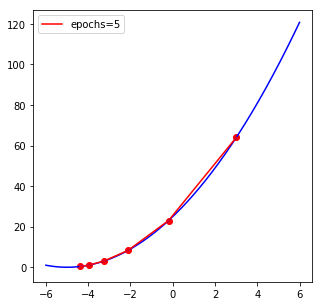

x:[ 3.         -0.20016    -2.120192   -3.27217279 -3.96333823 -4.37802367
 -4.62682664 -4.77610345 -4.86566655 -4.91940262 -4.95164318 -4.97098688
 -4.98259271 -4.98955597 -4.99373379 -4.9962404 ]


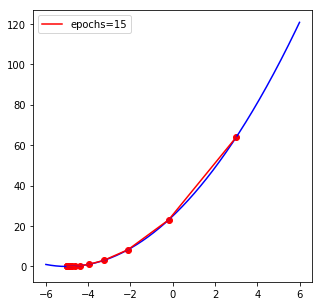

x:[ 3.         -0.20016    -2.120192   -3.27217279 -3.96333823 -4.37802367
 -4.62682664 -4.77610345 -4.86566655 -4.91940262 -4.95164318 -4.97098688
 -4.98259271 -4.98955597 -4.99373379 -4.9962404  -4.99774432 -4.99864663
 -4.99918801 -4.99951282 -4.9997077  -4.99982463 -4.99989478 -4.99993687
 -4.99996212 -4.99997727]


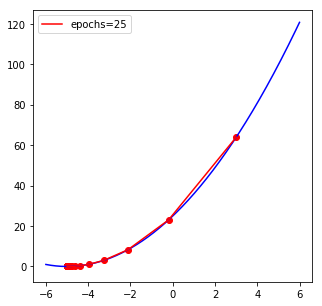

Different learning rate:
initial weight:3, epochs:15

x:[3.         2.99984    2.99968    2.99952001 2.99936002 2.99920003
 2.99904005 2.99888007 2.99872009 2.99856012 2.99840014 2.99824018
 2.99808021 2.99792025 2.99776029 2.99760034]


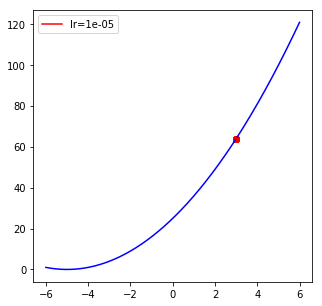

x:[ 3.         -0.20016    -2.120192   -3.27217279 -3.96333823 -4.37802367
 -4.62682664 -4.77610345 -4.86566655 -4.91940262 -4.95164318 -4.97098688
 -4.98259271 -4.98955597 -4.99373379 -4.9962404 ]


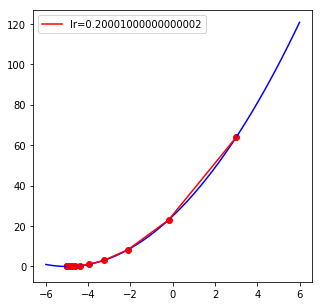

x:[ 3.         -3.40016    -4.680064   -4.9360192  -4.98720512 -4.99744128
 -4.99948831 -4.99989767 -4.99997954 -4.99999591 -4.99999918 -4.99999984
 -4.99999997 -4.99999999 -5.         -5.        ]


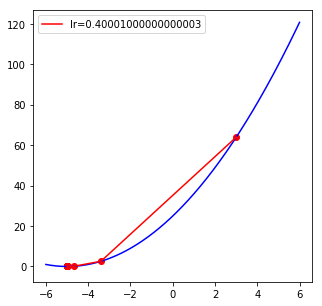

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

'''
# 目標函數:y=(x+5)^2

# 目標函數一階導數:dy/dx=2*(x+5)

'''

def func(x):
    return (x + 5) ** 2

def dfunc(x):
    return (2 * (x + 5))


def GD(w_init, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param w_init: w的init value    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置   
     """    
    xs = np.zeros(epochs+1) # 把 "epochs+1" 轉成dtype=np.float32    
    x = w_init    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要跨出的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# 起始權重
w_init = np.arange(1, 4)
# 執行週期數
epochs = np.arange(5, 50, 10)
# 學習率   
lr = np.arange(0.00001, 0.9, 0.2)
# 梯度下降法 
# x = GD(w_init, dfunc, epochs, lr=lr) 
# print (x)

# 可調整變數個數
num_var = 3

#劃出曲線圖
print('Different Initial weight:')
print(f'epochs:{epochs[1]}, learning rate:{lr[1]}\n')
for i in range(len(w_init)):
    x = GD(w_init[i], dfunc, epochs[1], lr[1])
    print (f'x:{x}')
    t = np.arange(-6.0, 6.0, 0.01)
    plt.figure(figsize=(5, 5))
    plt.plot(t, func(t), c='b')
    plt.plot(x, func(x), c='r', label='Initial weight={}'.format(w_init[i]))
    plt.scatter(x, func(x), c='r')
    plt.legend()
    plt.show()

    
print('Different epochs:')
print(f'initial weight:{w_init[2]}, learning rate:{lr[1]}\n')
for i in range(len(w_init)):
    x = GD(w_init[2], dfunc, epochs[i], lr[1])
    print (f'x:{x}')
    t = np.arange(-6.0, 6.0, 0.01)
    plt.figure(figsize=(5, 5))
    plt.plot(t, func(t), c='b')
    plt.plot(x, func(x), c='r', label='epochs={}'.format(epochs[i]))
    plt.scatter(x, func(x), c='r')
    plt.legend()
    plt.show()

print('Different learning rate:')
print(f'initial weight:{w_init[2]}, epochs:{epochs[1]}\n')
for i in range(len(w_init)):
    x = GD(w_init[2], dfunc, epochs[1], lr[i])
    print (f'x:{x}')
    t = np.arange(-6.0, 6.0, 0.01)
    plt.figure(figsize=(5, 5))
    plt.plot(t, func(t), c='b')
    plt.plot(x, func(x), c='r', label='lr={}'.format(lr[i]))
    plt.scatter(x, func(x), c='r')
    plt.legend()
    plt.show()



# 結果與討論

* 這個部份分成三個部份討論：
* 1. 不同的權重初始值對於於是否收斂的影響較小，主要影響會在第幾次收斂。
* 2. 不同的訓練次數會優關於是否收斂完成，若收斂次數太小，則還沒有等到收斂就已經結束更新。因此訓練次數不能太少。
* 3. Learning rate 影響收斂完成度及收斂的快慢，太小會出現收斂數度過慢的問題；太大則會出現震盪現象。

# 學習率對梯度下降法的影響 
學習率較小時，收斂到正確結果的速度較慢。
學習率較大時，容易在搜索過程中發生震盪。

<Figure size 432x288 with 0 Axes>

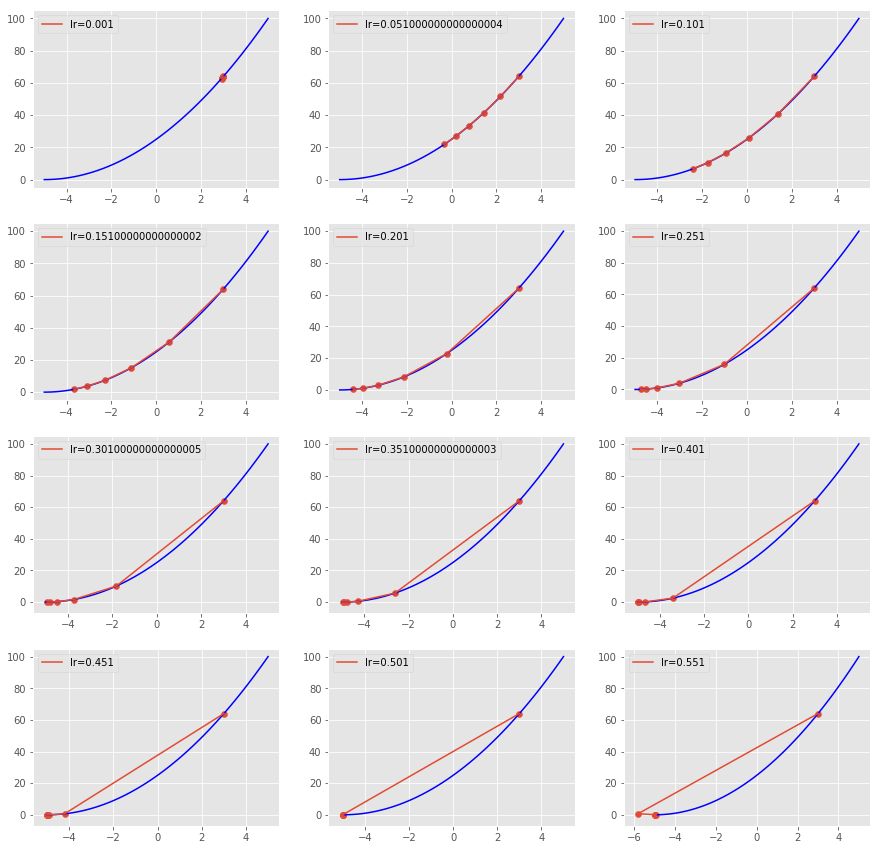

In [2]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Learning Rate')

w_init = 3
epochs = 5
lr = np.arange(0.001, 0.6, 0.05)
# lr = [0.001, 0.01, 0.1]

plt.style.use('ggplot')
size = np.ones(epochs+1) * 10
size[-1] = 70
plt.figure(figsize=(15, 15))
for i in range(len(lr)):
    x = GD(w_init, dfunc, epochs, lr=lr[i])
    plt.subplot(4, 3, i+1)
    plt.plot(line_x, line_y, c='b')
    plt.plot(x, func(x), label='lr={}'.format(lr[i]))
    plt.scatter(x, func(x))
    plt.legend()
plt.show()


# Result
學習率較大時，容易在搜索過程中發生震盪，而發生震盪的根本原因無非就是搜索的步長邁的太大了
如果讓能夠lr隨著迭代週期不斷衰減變小，那麼搜索時邁的步長就能不斷減少以減緩震盪學習率衰減因子由此誕生

# 學習率衰減公式

lr_i = lr_start * 1.0 / (1.0 + decay * i)


其中lr_i為第一迭代i時的學習率，lr_start為原始學習率，decay為一個介於[0.0, 1.0]的小數。從公式上可看出：

decay越小，學習率衰減地越慢，當decay = 0時，學習率保持不變。
decay越大，學習率衰減地越快，當decay = 1時，學習率衰減最快

In [3]:
def GD_decay(w_init, df, epochs, lr, decay):
    xs = np.zeros(epochs+1)
    x = w_init
    xs[0] = x
    v = 0
    for i in range(epochs):
        dx = df(x)
        # 學習率衰減 
        lr_i = lr * 1.0 / (1.0 + decay * i)
        # v表示x要改变的幅度
        v = - dx * lr_i
        x += v
        xs[i+1] = x
    return xs

<Figure size 432x288 with 0 Axes>

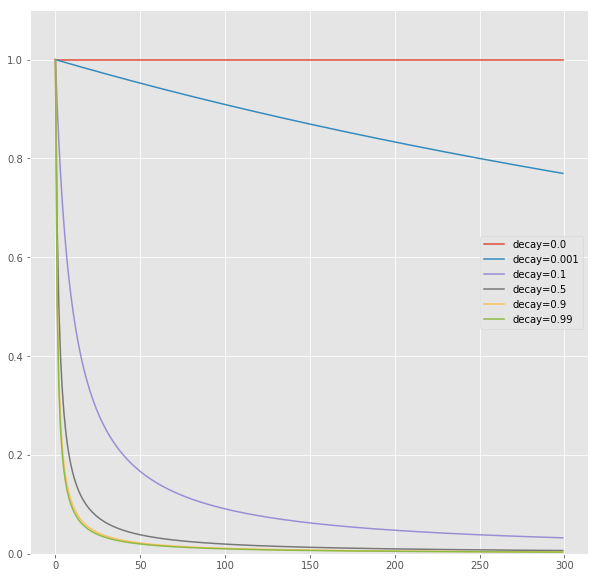

In [4]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

lr = 1.0
iterations = np.arange(300)
decay = [0.0, 0.001, 0.1, 0.5, 0.9, 0.99]

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
for i in range(len(decay)):
    decay_lr = lr * (1.0 / (1.0 + decay[i] * iterations))
    plt.plot(iterations, decay_lr, label='decay={}'.format(decay[i]))

plt.ylim([0, 1.1])
plt.legend(loc='best')
plt.show()

# Result
衰減越大，學習率衰減地越快。
衰減確實能夠對震盪起到減緩的作用

# Momentum (動量)
如何用“動量”來解決:

(1)學習率較小時，收斂到極值的速度較慢。

(2)學習率較大時，容易在搜索過程中發生震盪。

當使用動量時，則把每次w的更新量v考慮為本次的梯度下降量 (-dx*lr), 與上次w的更新量v乘上一個介於[0, 1]的因子momentum的和


w ← x − α ∗ dw (x沿負梯度方向下降)

v =  ß ∗ v − α  ∗ d w

w ← w + v

(ß 即momentum係數，通俗的理解上面式子就是，如果上一次的momentum（即ß ）與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，所以這樣做能夠達到加速收斂的過程 

如果上一次的momentum（即ß ）與這一次的負梯度方向是相反的，那這次下降的幅度就會縮減，所以這樣做能夠達到減速收斂的過程 



<Figure size 432x288 with 0 Axes>

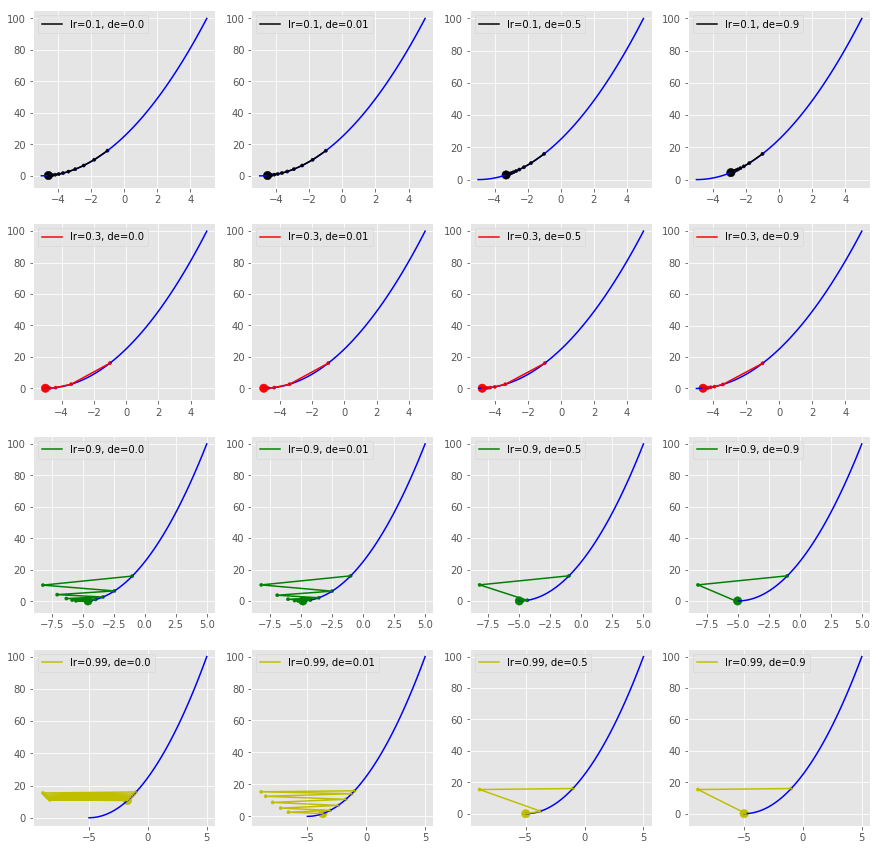

In [5]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

x_start = -1
epochs = 10

lr = [0.1, 0.3, 0.9, 0.99]
decay = [0.0, 0.01, 0.5, 0.9]


color = ['k', 'r', 'g', 'y']

row = len(lr)
col = len(decay)
size = np.ones(epochs + 1) * 10
size[-1] = 70
plt.figure(figsize=(15,15))
for i in range(row):
     for j in range(col):
        x = GD_decay(x_start, dfunc, epochs, lr=lr[i], decay=decay[j])
        plt.subplot(row, col, i * col + j + 1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, func(x), c=color[i], label='lr={}, de={}'.format(lr[i], decay[j]))
        plt.scatter(x, func(x), c=color[i], s=size)
        plt.legend(loc=0)
plt.show()